In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

get data from csv file

In [15]:
df = pd.read_csv('results.csv')
df.head()

,num_utenti,metrica,richiesta,valore_medio
0,1,response_times,search_page,23.95
1,1,response_times,movie_detail,79.88
2,1,response_times,total,103.83
3,1,throughput,search_page,0.18
4,1,throughput,movie_detail,0.18


get service time

In [16]:
# find rows with num_utenti = 1
df1 = df[df['num_utenti'] == 1]

# find rows with metrica = response_times
df2 = df1[df1['metrica'] == 'response_times']

# get list of valore_medio for each kind of richiesta
mu_db = df2[df2['richiesta'] == 'movie_detail']['valore_medio'].mean()
mu_server = df2[df2['richiesta'] == 'search_page']['valore_medio'].mean()
mu_total = df2[df2['richiesta'] == 'total']['valore_medio'].mean()

print(mu_db, mu_server, mu_total)

87.268 22.945 110.21300000000001


results graph: response time vs number of users and throughput vs number of users

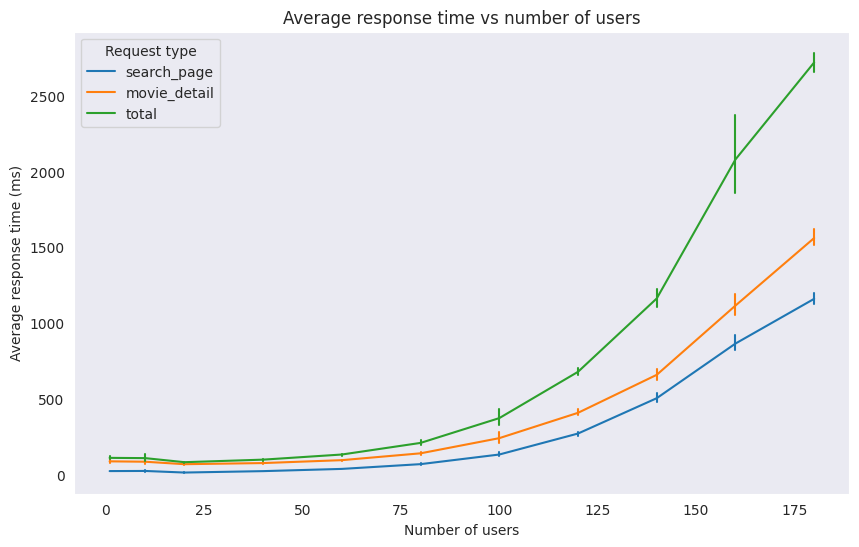

In [17]:
df_response_times = df[df['metrica'] == 'response_times']

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_response_times, x="num_utenti", y="valore_medio", hue="richiesta",
    legend=True, err_style="bars", errorbar=("ci", 95)
)

# grid and labels
plt.grid()
plt.xlabel('Number of users')
plt.ylabel('Average response time (ms)')
plt.title('Average response time vs number of users')
plt.legend(title='Request type')

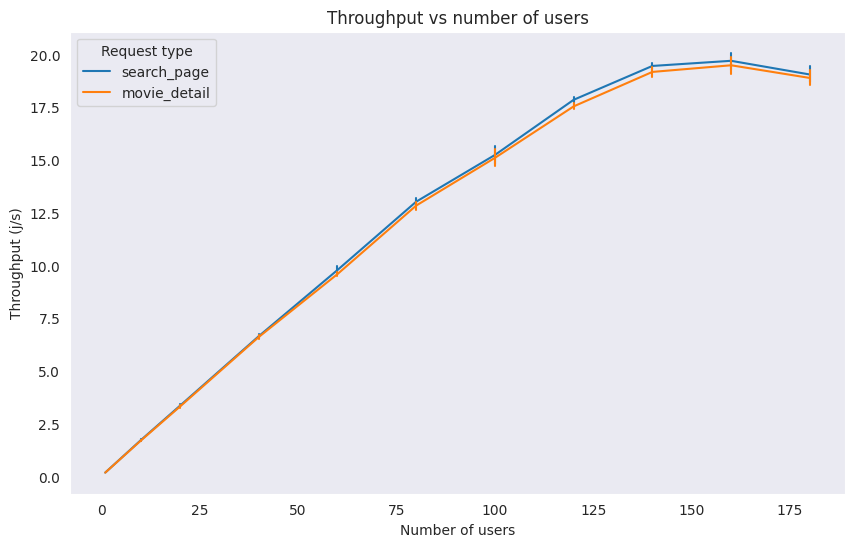

In [18]:
df_throughput = df[df['metrica'] == 'throughput']
# remove total request
df_throughput = df_throughput[df_throughput['richiesta'] != 'total']

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df_throughput, x="num_utenti", y="valore_medio", hue="richiesta",
    legend=True, err_style="bars", errorbar=("ci", 95)
)

# grid and labels
plt.grid()
plt.xlabel('Number of users')
plt.ylabel('Throughput (j/s)')
plt.title('Throughput vs number of users')
plt.legend(title='Request type')

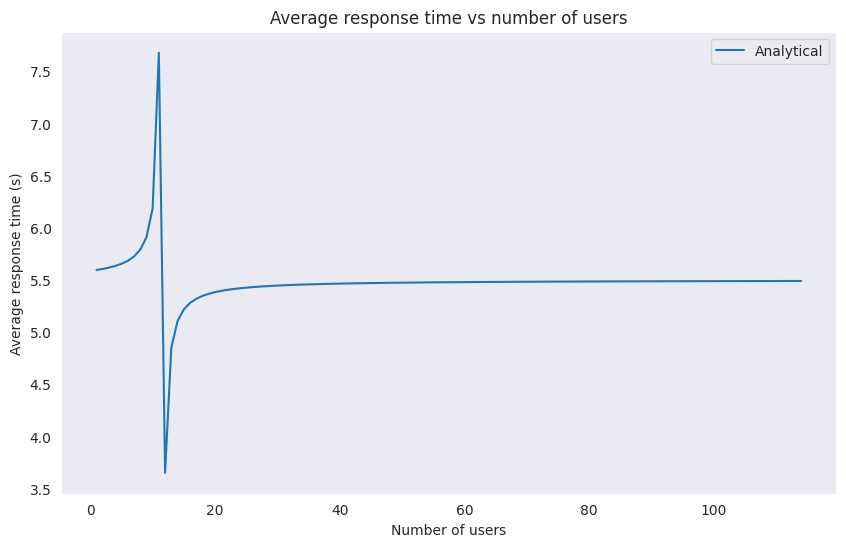

In [19]:
# convert mu db to seconds
mu_db_s = mu_db / 1000

# Define the parameters
D = 1 / (1 / mu_db_s)   # Service demand at the bottleneck (time units)
Z = 5.5                 # Think time (time units)

# Create an array of number of customers
N_values = np.arange(1, 10 / D)  # Avoiding values that overload the system